# Import libraries

## Ipython notebook magic

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload

## Python libraries

In [13]:
import pylab
import csv
import sys
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import re
import time
import datetime
import pandas as pd
from scipy.optimize import curve_fit

# Get the data

In [4]:
data = pd.read_csv('../data/svd_data.csv', index_col=0)

Text(0,0.5,'Intensity')

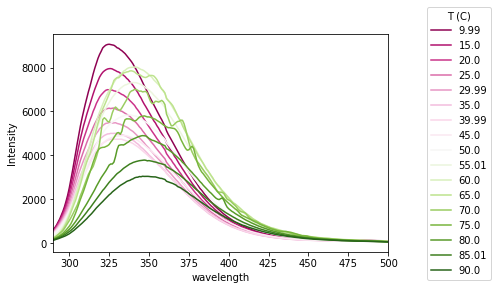

In [5]:
data.plot(colormap=plt.get_cmap('PiYG'))
plt.legend(title = 'T (C)', 
           loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.ylabel('Intensity')

This is protein unfolding capture by fluorimeter. At each temperature we measure emission spectrum of the protein (Int vs wavelength). Change in the spectrum with temperature reflects changes in protein structure. **We would like to find the temperature of unfolding from this data**.

## SVD

In [6]:
data.shape

(211, 17)

In [7]:
U, S, V = scipy.linalg.svd(data.values, full_matrices=True)
U.shape,  S.shape, V.shape

((211, 211), (17,), (17, 17))

## Plot results

Contribution of individual eigen shapes to the data

Text(0,0.5,'Cumulative weight, %')

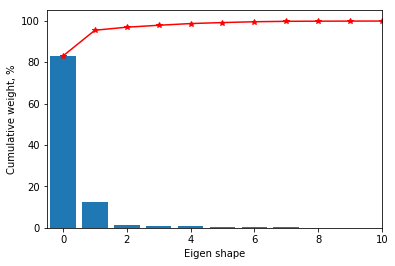

In [23]:
plt.plot(np.cumsum(S)/sum(S)*100, 'r*-')
plt.bar(height = S/sum(S)*100, x = np.arange(len(S)))
plt.xlim(-0.5, 10)
plt.xlabel('Eigen shape')
plt.ylabel('Cumulative weight, %')

We can see that with two first singular shapes we can approximate the original dataset very accurately. So I'll be considering only first two singular shapes/trends in further analysis.

Let's now look at the first few singular shapes.

Text(0,0.5,'Amplitude')

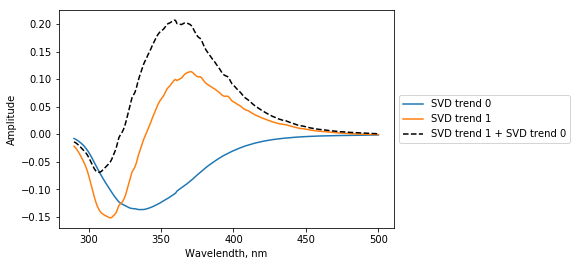

In [31]:
_ = plt.plot(data.index, U[:,0], label = 'SVD trend 0')
_ = plt.plot(data.index, U[:,1], label = 'SVD trend 1')
_ = plt.plot(data.index, U[:,1] - U[:,0], label = 'SVD trend 1 + SVD trend 0', 
             linestyle = '--', color = 'k')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
_ = plt.xlabel('Wavelendth, nm')
plt.ylabel('Amplitude')

As you can see, SVD trend 0 indeed very closely matches the shape of the spectra, while SVD trend 1 allows for the shift when combined with SVD trend 0.

Singular trends

In [10]:
max_wav_norm = ((data.idxmax() - data.idxmax().mean())/
                (data.idxmax().max() - data.idxmax().mean())
               ).values
max_int_norm = (data.max()/data.max().max()).values

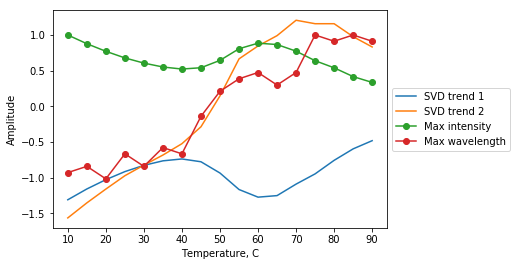

In [11]:
_ = plt.plot(np.array(data.columns).astype('float'), V[0]*4, label = 'SVD trend 1')
_ = plt.plot(np.array(data.columns).astype('float'), V[1]*4, label = 'SVD trend 2')
plt.xlabel('Temperature, C')
plt.ylabel('Amplitude')
_ = plt.plot(np.array(data.columns).astype('float'), max_int_norm, label = 'Max intensity', marker = 'o')
_ = plt.plot(np.array(data.columns).astype('float'), max_wav_norm, label = 'Max wavelength', marker = 'o')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

As you can see 1st SVD trends essentially captures decrease in spectrum intensity, while 2nd SVD trend captures shift of the spectrum.